-Training completo tra 5mln a 10mln di TimeStamp e tra 5000 e 10000 episodi

-Per un tuning rapido da 500k a 1mln di TimeStamp e tra 500 a 1k episodi per trial (consigliati 500 trial)

-Per i test preliminari 1mln di timestamp e 1k/2k episodi

- CHAT con search dice che per il train vanno bene anche 1mln di timestamp

In [13]:
import tensorflow as tf
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
import numpy as np
import matplotlib.pyplot as plt
import os


from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import HParam
from stable_baselines3.common.callbacks import EvalCallback, CallbackList

In [14]:
class HParamCallback(BaseCallback):
    """
    Saves the hyperparameters and metrics at the start of the training, and logs them to TensorBoard.
    """

    def _on_training_start(self) -> None:
        hparam_dict = {
            "algorithm": self.model.__class__.__name__,
            "learning rate": self.model.learning_rate,
            "gamma": self.model.gamma,
        }
        # define the metrics that will appear in the `HPARAMS` Tensorboard tab by referencing their tag
        # Tensorbaord will find & display metrics from the `SCALARS` tab
        metric_dict = {
            #"rollout/ep_len_mean": 0,
            #"train/value_loss": 0.0,
        }
        self.logger.record(
            "hparams",
            HParam(hparam_dict, metric_dict),
            exclude=("stdout", "log", "json", "csv"),
        )

    def _on_step(self) -> bool:
        return True

BEST_1 (PPO_4) -> {'reset_noise_scale': 0.16872520546404454, 'forward_reward_weight': 0.569165596187308, 'ctrl_cost_weight': 0.15369909636721105, 'healthy_reward': 1.1651483169773327, 'learning_rate': 0.00025118614395972893, 'n_steps': 4096, 'batch_size': 256, 'gamma': 0.9900195327210904, 'gae_lambda': 0.8063306496367846, 'clip_range': 0.1411162146550987, 'ent_coef': 0.006226601057899701, 'variance_penalty_weight': 0.0007310600475679448}


BEST_2 (PPO_6) -> 

hp_reset_noise_scale=0.10405074414945424 # scala del rumore quando l'ambiente viene resettato 

hp_forward_reward_weight=0.5940601384640877 # peso del reward per il movimento in avanti

hp_ctrl_cost_weight=0.14771040407991193 # peso del reward per il controllo

hp_healthy_reward =1.4039427670916238 # reward per la salute


hp_policy="MlpPolicy"           # Tipo di policy: una rete neurale MLP (Multilayer Perceptron) che mappa osservazioni ad azioni

hp_learning_rate=0.00014010166026390974           # Tasso di apprendimento: controlla la velocità con cui il modello apprende aggiornando i pesi

hp_n_steps=4096                 # Numero di passi da eseguire nell'ambiente per ogni ciclo di aggiornamento della policy

hp_batch_size=64                # Dimensione del batch per gli aggiornamenti stocastici: suddivide i dati raccolti nei mini-batch

hp_n_epochs=10                  # Numero di volte (epoch) che il dataset raccolto viene utilizzato per aggiornare la policy

hp_gamma=0.9974446213345484      # Fattore di sconto: determina l'importanza delle ricompense future rispetto a quelle immediate

hp_gae_lambda=0.8025419607496327              # Parametro per il Generalized Advantage Estimation (GAE): bilancia bias e varianza nella stima dell'advantage

hp_clip_range=0.16218657788555388               # Intervallo di clipping: limita le variazioni della policy per mantenere aggiornamenti stabili

hp_ent_coef=0.00017603718662988996                 # Coefficiente di entropia: controlla l'incentivo all'esplorazione; 0 significa nessun bonus per l'entropia

PPO_7 {'reset_noise_scale': 0.16260110616284057, 'forward_reward_weight': 0.6594701821995568, 'ctrl_cost_weight': 0.13678469591501632, 'healthy_reward': 1.4384387807236847, 'contact_cost_weight': 0.0007721118603343064, 'healthy_z_lower': 0.11270460095319094, 'healthy_z_upper': 1.1367622027728483, 'contact_force_min': -0.8099290655891269, 'contact_force_max': 0.7683440461793597, 'learning_rate': 0.0001620494220647337, 'n_steps': 4096, 'batch_size': 64, 'gamma': 0.9960403688730154, 'gae_lambda': 0.8519055821923104, 'clip_range': 0.28172421812629234, 'ent_coef': 0.015960745859518122, 'variance_penalty_weight': 0.011924537413547313}.

PPO_8 -> {'reset_noise_scale': 0.14953307712823055, 'forward_reward_weight': 0.5971580841907844, 'ctrl_cost_weight': 0.21085190913852067, 'healthy_reward': 1.3432502908397173, 'contact_cost_weight': 0.0006565424645557624, 'healthy_z_lower': 0.11576255546554826, 'healthy_z_upper': 1.0657755912005253, 'contact_force_min': -0.7947792512332761, 'contact_force_max': 0.7599774107257553, 'learning_rate': 0.0001417417141818677, 'n_steps': 4096, 'batch_size': 64, 'gamma': 0.9977321276628237, 'gae_lambda': 0.8135998374897728, 'clip_range': 0.2502648636777115, 'ent_coef': 0.006686448422595028, 'variance_penalty_weight': 0.0008985044453683972}


PPO_9 -> {'reset_noise_scale': 0.1224648700491494, 'forward_reward_weight': 1.0798217517026751, 'ctrl_cost_weight': 0.2788960190947023, 'healthy_reward': 1.4972086156641724, 'contact_cost_weight': 0.00019495257535118138, 'healthy_z_lower': 0.10525289571959973, 'healthy_z_upper': 1.1803240798353063, 'contact_force_min': -0.5187992701613672, 'contact_force_max': 0.5870857431066443, 'learning_rate': 0.000983439712869658, 'n_steps': 2048, 'batch_size': 512, 'gamma': 0.9686135698396399, 'gae_lambda': 0.9145395422692033, 'clip_range': 0.37757085535729756, 'ent_coef': 0.00017055556769922042, 'std_penalty_weight': 0.28813167612676016}



PPO_10 -> {'reset_noise_scale': 0.0811219889284557, 'forward_reward_weight': 0.794019967338759, 'ctrl_cost_weight': 0.1909084649203593, 'healthy_reward': 1.4695470159426132, 'contact_cost_weight': 0.00048075670076003045, 'healthy_z_lower': 0.19353492629665098, 'healthy_z_upper': 1.1936905952567158, 'contact_force_min': -0.5349939620294489, 'contact_force_max': 0.7307512698224117, 'learning_rate': 0.0003564760563058714, 'n_steps': 2048, 'batch_size': 512, 'gamma': 0.9762294172462653, 'gae_lambda': 0.9261117656360015, 'clip_range': 0.3320669028429513, 'ent_coef': 0.0026780011357637598, 'std_penalty_weight': 0.20050838533111062}.


PPO_11 -> {'reset_noise_scale': 0.19063551485460006, 'forward_reward_weight': 1.1874610350303911, 'ctrl_cost_weight': 0.7635871233517055, 'healthy_reward': 0.9167550523607197, 'contact_cost_weight': 0.00031549876314330944, 'healthy_z_lower': 0.20679790820057092, 'healthy_z_upper': 0.9706826850531042, 'contact_force_min': -0.5166260803523359, 'contact_force_max': 0.8952287392588767, 'learning_rate': 2.9390505260778442e-05, 'n_steps': 6144, 'batch_size': 4096, 'gamma': 0.9776577251734287, 'gae_lambda': 0.9466444608224389, 'clip_range': 0.42321693449630365, 'ent_coef': 0.08075447939975819}


In [15]:
# Ipreparametri dell'envrionment
hp_reset_noise_scale= 0.19063551485460006 # scala del rumore quando l'ambiente viene resettato 
hp_forward_reward_weight = 1.1874610350303911 # peso del reward per il movimento in avanti
hp_ctrl_cost_weight = 0.7635871233517055 # peso del reward per il controllo
hp_healthy_reward = 0.9167550523607197 # reward per la salute

hp_contact_cost_weight = 0.00031549876314330944
healthy_z = (0.20679790820057092, 0.9706826850531042)
contact_force = (-0.5166260803523359, 0.8952287392588767)


# Iperparametri del modello/policy
hp_policy="MlpPolicy"           # Tipo di policy: una rete neurale MLP (Multilayer Perceptron) che mappa osservazioni ad azioni
hp_learning_rate=2.9390505260778442e-05           # Tasso di apprendimento: controlla la velocità con cui il modello apprende aggiornando i pesi
hp_n_steps=6144                 # Numero di passi da eseguire nell'ambiente per ogni ciclo di aggiornamento della policy
hp_batch_size=4096                # Dimensione del batch per gli aggiornamenti stocastici: suddivide i dati raccolti nei mini-batch
hp_n_epochs=6                  # Numero di volte (epoch) che il dataset raccolto viene utilizzato per aggiornare la policy
hp_gamma=0.9776577251734287      # Fattore di sconto: determina l'importanza delle ricompense future rispetto a quelle immediate
hp_gae_lambda=0.9466444608224389              # Parametro per il Generalized Advantage Estimation (GAE): bilancia bias e varianza nella stima dell'advantage
hp_clip_range=0.42321693449630365               # Intervallo di clipping: limita le variazioni della policy per mantenere aggiornamenti stabili
hp_ent_coef=0.08075447939975819                 # Coefficiente di entropia: controlla l'incentivo all'esplorazione; 0 significa nessun bonus per l'entropia


In [16]:
def make_env():
    """
    Crea e restituisce l'ambiente Ant-v5 dalla libreria Gymnasium.

    Questa funzione istanzia l'ambiente "Ant-v5", uno degli ambienti recenti e ben supportati
    in Gymnasium. I parametri usati sono:
    - reset_noise_scale (0.1): determina la scala del rumore quando l'ambiente viene resettato.
    - render_mode ('None'): indica che non verrà effettuato il rendering durante l'esecuzione.

    Ritorna:
        gym.Env: l'ambiente Ant-v5 inizializzato.
    """
    
    # Ant-v5 è l’ambiente più recente in Gymnasium.
    return gym.make("Ant-v5", 
                    reset_noise_scale=hp_reset_noise_scale, # scala del rumore quando l'ambiente viene resettato 
                    forward_reward_weight=hp_forward_reward_weight, # peso del reward per il movimento in avanti
                    ctrl_cost_weight=hp_ctrl_cost_weight, # peso del reward per il controllo
                    healthy_reward =hp_healthy_reward, # reward per la salute
                    contact_cost_weight=hp_contact_cost_weight,
                    healthy_z_range=healthy_z,
                    contact_force_range=contact_force,
                    render_mode='none')

In [17]:
# 1. Creiamo un ambiente vettorializzato (Vectorized Environment)
# Utilizziamo DummyVecEnv per gestire più istanze dell'ambiente come se fossero una singola entità.
# Qui passiamo la funzione make_env (definita in un'altra cella) che crea l'ambiente "Ant-v5".
env = DummyVecEnv([make_env])  

# 2. Normalizziamo osservazioni (obs) e ricompense (reward)
# VecNormalize scala le osservazioni e le ricompense per stabilizzare l'allenamento.
# Parametri:
#   norm_obs=True   -> Abilita la normalizzazione delle osservazioni.
#   norm_reward=True -> Abilita la normalizzazione delle ricompense.
#   clip_obs=10.     -> Limita i valori normalizzati dell'osservazione a un range [-10, 10] per evitare estremi.
env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10.)

/Users/ignazioemanuelepicciche/Documents/Ignazio PC/ucbm/deep_learning/Reinforcement_Learning_MuJoCu/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:734: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array', 'depth_array']).
  logger.warn(


In [18]:
# 3. Definiamo il modello RL (PPO) con spiegazioni dettagliate per ciascun parametro

model = PPO(
    policy=hp_policy,           # Tipo di policy: una rete neurale MLP (Multilayer Perceptron) che mappa osservazioni ad azioni
    env=env,                      # Ambiente di addestramento: usa l'ambiente vettorializzato e normalizzato creato in precedenza
    learning_rate=hp_learning_rate,           # Tasso di apprendimento: controlla la velocità con cui il modello apprende aggiornando i pesi
    n_steps=hp_n_steps,                 # Numero di passi da eseguire nell'ambiente per ogni ciclo di aggiornamento della policy
    batch_size=hp_batch_size,                # Dimensione del batch per gli aggiornamenti stocastici: suddivide i dati raccolti nei mini-batch
    n_epochs=hp_n_epochs,                  # Numero di volte (epoch) che il dataset raccolto viene utilizzato per aggiornare la policy
    gamma=hp_gamma,      # Fattore di sconto: determina l'importanza delle ricompense future rispetto a quelle immediate
    gae_lambda=hp_gae_lambda,              # Parametro per il Generalized Advantage Estimation (GAE): bilancia bias e varianza nella stima dell'advantage
    clip_range=hp_clip_range,               # Intervallo di clipping: limita le variazioni della policy per mantenere aggiornamenti stabili
    ent_coef=hp_ent_coef,                 # Coefficiente di entropia: controlla l'incentivo all'esplorazione; 0 significa nessun bonus per l'entropia
    seed=42,                        # Seed per la riproducibilità
    verbose=1,                    # Livello di verbosità: 1 per stampare informazioni di log utili durante l'addestramento
    tensorboard_log="./ppo_Ant_tensorboard/",  # Cartella per salvare i log di TensorBoard
    device='mps'                    # Specifica l'uso della GPU su Apple Silicon
)

Using mps device


/Users/ignazioemanuelepicciche/Documents/Ignazio PC/ucbm/deep_learning/Reinforcement_Learning_MuJoCu/.venv/lib/python3.10/site-packages/stable_baselines3/ppo/ppo.py:155: UserWarning: You have specified a mini-batch size of 4096, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6144`, after every 1 untruncated mini-batches, there will be a truncated mini-batch of size 2048
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6144 and n_envs=1)
  warnings.warn(
/Users/ignazioemanuelepicciche/Documents/Ignazio PC/ucbm/deep_learning/Reinforcement_Learning_MuJoCu/.venv/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `e

In [19]:
eval_env = DummyVecEnv([make_env])
eval_env = VecNormalize(eval_env, norm_obs=True, norm_reward=True, clip_obs=10.)

In [20]:
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/best_model",
    log_path="./logs/",
    eval_freq=10000,
    deterministic=True,
    render=False
)

In [ ]:
# 4. Alleniamo il modello
# Il parametro total_timesteps indica il numero totale di iterazioni (o passi)
# che il modello eseguirà durante l'allenamento. Ogni timestep rappresenta un'interazione
# con l'ambiente in cui il modello esegue un'azione e riceve un feedback, che viene poi
# usato per aggiornare la sua politica interna.
total_timesteps = 1000000  # Puoi aumentare questo valore per permettere al modello di acquisire più esperienza.
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

Logging to ./ppo_Ant_tensorboard/PPO_11
-----------------------------
| time/              |      |
|    fps             | 380  |
|    iterations      | 1    |
|    time_elapsed    | 16   |
|    total_timesteps | 6144 |
-----------------------------


/Users/ignazioemanuelepicciche/Documents/Ignazio PC/ucbm/deep_learning/Reinforcement_Learning_MuJoCu/.venv/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=9.19 +/- 0.80
Episode length: 1000.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1e+03        |
|    mean_reward          | 9.19         |
| time/                   |              |
|    total_timesteps      | 10000        |
| train/                  |              |
|    approx_kl            | 6.110051e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.423        |
|    entropy_loss         | -11.4        |
|    explained_variance   | -1.94        |
|    learning_rate        | 2.94e-05     |
|    loss                 | -0.674       |
|    n_updates            | 6            |
|    policy_gradient_loss | -0.00034     |
|    std                  | 1            |
|    value_loss           | 0.542        |
------------------------------------------
New best mean reward!
------------------------------
| time/              |       |
|    fps   

In [10]:
#5. Salviamo il modello
model.save("ppo_Ant_model")
env.save("vecnormalize_Ant.pkl")  # salviamo anche i parametri di normalizzazione

In [11]:
# 200-400 episodi sono adeguati 
def evaluate_policy(env, policy, episodes=500):
    """
    Valuta una policy addestrata su un ambiente dato.

    Parametri:
    - env: L'ambiente di simulazione.
    - policy: La policy addestrata da valutare.
    - episodes: Numero di episodi da eseguire per la valutazione.

    Ritorna:
    - La ricompensa media e la deviazione standard delle ricompense ottenute.
    """
    total_rewards = []
    for _ in range(episodes):
        obs = env.reset()  # Reset dell'ambiente per iniziare un nuovo episodio
        done = False
        total_reward = 0
        while not done:
            action, _ = policy.predict(obs)  # Predice l'azione da eseguire
            obs, reward, done, _ = env.step(action)  # Esegue l'azione e ottiene il feedback dall'ambiente
            total_reward += reward  # Accumula la ricompensa ottenuta
        total_rewards.append(total_reward)  # Aggiunge la ricompensa totale dell'episodio alla lista
    return np.mean(total_rewards), np.std(total_rewards)  # Calcola e ritorna la media e la deviazione standard delle ricompense

# 200-400 episodi sono adeguati 
def evaluate_random_policy(env, episodes=500):
    """
    Valuta una policy casuale su un ambiente dato.

    Parametri:
    - env: L'ambiente di simulazione.
    - episodes: Numero di episodi da eseguire per la valutazione.

    Ritorna:
    - La ricompensa media e la deviazione standard delle ricompense ottenute.
    """
    total_rewards = []
    for _ in range(episodes):
        obs = env.reset()  # Reset dell'ambiente per iniziare un nuovo episodio
        done = False
        total_reward = 0
        while not done:
            action = env.action_space.sample()  # Genera un'azione casuale
            obs, reward, done, _ = env.step(np.array([action]))  # Esegue l'azione e ottiene il feedback dall'ambiente
            total_reward += reward  # Accumula la ricompensa ottenuta
        total_rewards.append(total_reward)  # Aggiunge la ricompensa totale dell'episodio alla lista
    return np.mean(total_rewards), np.std(total_rewards)  # Calcola e ritorna la media e la deviazione standard delle ricompense

Trained Policy: Mean Reward: 36.27058029174805, Std: 11.181402206420898
Random Policy: Mean Reward: 14.548761367797852, Std: 12.113778114318848


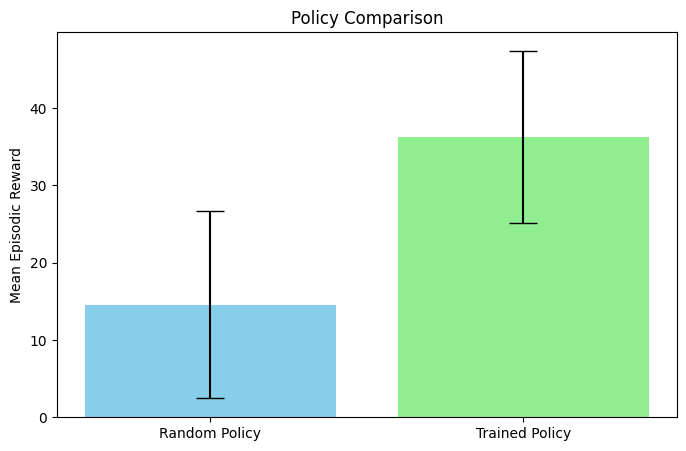

In [12]:
# Valutazione dopo l'addestramento
mean_reward_trained, std_reward_trained = evaluate_policy(env, model)  # Valuta la policy addestrata
mean_reward_random, std_reward_random = evaluate_random_policy(env)  # Valuta la policy casuale

# Stampa dei risultati
print(f"Trained Policy: Mean Reward: {mean_reward_trained}, Std: {std_reward_trained}")
print(f"Random Policy: Mean Reward: {mean_reward_random}, Std: {std_reward_random}")

# Creazione del grafico di confronto
labels = ['Random Policy', 'Trained Policy']
means = [mean_reward_random, mean_reward_trained]
stds = [std_reward_random, std_reward_trained]

plt.figure(figsize=(8, 5))
plt.bar(labels, means, yerr=stds, capsize=10, color=['skyblue', 'lightgreen'])
plt.ylabel('Mean Episodic Reward')
plt.title('Policy Comparison')
plt.show()